In [46]:
from novel_toy_tools.utils import generate_renditions
import polars as pl

import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import major_axis_features



# just rename the columns to fit with my function

In [47]:
original_csv = "../data/experimental_datasets/PVMDA 7-1 Dataset/PVMDA 7-1 Frame Data Merged N = 108 1Hz.csv"
conformed_csv_path = "../data/experimental_datasets/PVMDA 7-1 Dataset/rotation_data.csv"
output_directory = "../data/experimental_datasets/PVMDA 7-1 Dataset/renditions"
object_directory = "../data/PrefViews All 3D objects"

In [48]:
dataset = pl.read_csv(original_csv, null_values=["#N/A"])
dataset

KID_IDFrameKey,KID_ID,DOE,Coder,TrialNumber,Object,Condition,FrameNumber,FrameCoding,EulerAngleX,EulerAngleY,EulerAngleZ,AzimuthElongAxis,ElevationElongAxis,AzimuthElongAxisBin,ElevationElongAxisBin,ElongAxisAngleHor,ElongAxisAngleVer,ElongAxisAngleFor,ElongAxisPosition,ElongAxisX,ElongAxisY,ElongAxisZ,FrontAxisX,FrontAxisY,FrontAxisZ,TopAxisX,TopAxisY,TopAxisZ,ObjOrientationAzimuth,ObjOrientationElevation,ObjOrientationAzimuthBin,ObjOrientationElevationBin,ObjOrientationAzimuthUDBin,ObjOrientationElevationUDBin,AngleFront,AngleTop,…,Area,Centroid_x,Centroid_y,BoundingBox_x,BoundingBox_y,BoundingBox_width,BoundingBox_weight,ConvexArea,EquivDiameter,Solidity,Eccentricity,Orientation,EulerNumber,Extent,MajorAxisLength,MinorAxisLength,FilledArea,Perimeter,pixelOverlap,PixelOverlapCorrected,AspectRatio,AspectRatioRangeNorm,AreaCopy,AreaRangeNorm,UAngleVectorsElongLoS,AngleElongLoSUncorrected,UAngleElongUpright,ElongAngleTransvPlane,UAngleVectorsTopUpright,AngleTopUprightUncorrected,ElongAxisXCopy,ElongAxisYCopy,ElongAxisZCopy,AngleElongLoSUncorrectedBin,ElongAxisAngleHorPlaneBin,BiAngleELoSHorPlaneBin,BiAngleELoSHorPlaneDesc
str,i64,str,str,i64,str,str,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,…,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str
"""3383_20""",3383,"""8/8/01""","""MA""",1,"""Shovel""","""Known""",20,1,166.43323,-139.69881,53.82206,49.7,-53.8,10,3,116.8,36.2,112.4,0,-0.45019,0.80719,0.38181,-0.45019,0.80719,0.38181,0.48435,-0.13847,0.86385,-130.7,59.8,2,8,2,11,112.4,-149.8,…,32903,621.270401,455.286904,478.5,266.5,287,424,50084,204.678775,0.656956,0.981872,-62.312467,0,0.270388,568.075195,107.674552,33496,1138.364,0,0,5.275854,0.482831,32903,0.972565,112.445843,67.554157,36.177712,53.822288,97.959321,82.040679,-0.45019,0.80719,0.38181,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_21""",3383,"""3/27/00""","""MA""",1,"""Shovel""","""Known""",21,1,-146.4509,174.74855,60.71553,95.3,-60.7,12,2,119.1,29.3,87.4,0,-0.48709,0.8722,-0.04477,-0.48709,0.8722,-0.04477,0.40372,0.27033,0.87403,174.7,60.9,16,8,16,8,87.4,-150.9,…,31360,631.322034,474.63192,479.5,270.5,299,440,50815,199.821901,0.617141,0.985446,-61.867709,0,0.23837,597.972602,101.649499,32515,1182.573,28299,28299,5.882691,0.551945,31360,0.916643,87.43401,87.43401,29.284691,60.715309,74.316095,74.316095,-0.48709,0.8722,-0.04477,3,3,"""L[60, 90]_H[60, 90]""","""Expanded_Vertical"""
"""3383_22""",3383,"""3/19/00""","""MA""",1,"""Shovel""","""Known""",22,1,-136.33371,159.18131,59.4225,110.8,-59.4,13,2,118.4,30.6,79.6,0,-0.47549,0.86094,-0.1808,-0.47549,0.86094,-0.1808,0.29854,0.35124,0.88742,156.9,62.6,15,8,15,8,79.6,-152.6,…,30493,636.175057,483.736792,484.5,277.5,296,432,50202,197.040335,0.607406,0.984936,-62.223973,0,0.238465,587.569415,101.600864,31693,1176.858,29856,29856,5.783114,0.540604,30493,0.88522,79.583639,79.583639,30.57771,59.42229,69.436822,69.436822,-0.47549,0.86094,-0.1808,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_25""",3383,"""3/17/00""","""MA""",1,"""Shovel""","""Known""",25,1,-144.06812,164.43602,36.79765,105.6,-36.8,13,3,140.5,53.2,77.6,0,-0.77139,0.59899,-0.21485,-0.77139,0.59899,-0.21485,0.12135,0.4699,0.87434,153.7,61.0,15,8,15,8,77.6,-151.0,…,30083,635.433401,487.484061,432.5,318.5,405,341,49719,195.711178,0.60506,0.984331,-39.021051,0,0.217827,578.007925,101.91993,31247,1172.442,10965,10965,5.671196,0.527858,30083,0.870361,77.593273,77.593273,53.202404,36.797596,61.972194,61.972194,-0.77139,0.59899,-0.21485,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_26""",3383,"""3/8/00""","""MA""",1,"""Shovel""","""Known""",26,1,-130.36304,154.19096,32.6282,115.8,-32.6,13,4,139.3,57.4,68.5,0,-0.75818,0.53919,-0.36667,-0.75818,0.53919,-0.36667,0.08789,0.64171,0.76189,145.5,49.6,14,7,14,7,68.5,-139.6,…,27937,641.93267,492.764398,437.5,338.5,400,306,45894,188.601413,0.60

In [49]:
dataset = dataset.with_columns(pl.col('KID_IDFrameKey') + "_" + pl.col('Object'))
dataset_conformed = dataset.rename({"EulerAngleX": "Euler_X", "EulerAngleY": "Euler_Y", "EulerAngleZ": "Euler_Z"})

In [50]:
dataset_conformed

KID_IDFrameKey,KID_ID,DOE,Coder,TrialNumber,Object,Condition,FrameNumber,FrameCoding,Euler_X,Euler_Y,Euler_Z,AzimuthElongAxis,ElevationElongAxis,AzimuthElongAxisBin,ElevationElongAxisBin,ElongAxisAngleHor,ElongAxisAngleVer,ElongAxisAngleFor,ElongAxisPosition,ElongAxisX,ElongAxisY,ElongAxisZ,FrontAxisX,FrontAxisY,FrontAxisZ,TopAxisX,TopAxisY,TopAxisZ,ObjOrientationAzimuth,ObjOrientationElevation,ObjOrientationAzimuthBin,ObjOrientationElevationBin,ObjOrientationAzimuthUDBin,ObjOrientationElevationUDBin,AngleFront,AngleTop,…,Area,Centroid_x,Centroid_y,BoundingBox_x,BoundingBox_y,BoundingBox_width,BoundingBox_weight,ConvexArea,EquivDiameter,Solidity,Eccentricity,Orientation,EulerNumber,Extent,MajorAxisLength,MinorAxisLength,FilledArea,Perimeter,pixelOverlap,PixelOverlapCorrected,AspectRatio,AspectRatioRangeNorm,AreaCopy,AreaRangeNorm,UAngleVectorsElongLoS,AngleElongLoSUncorrected,UAngleElongUpright,ElongAngleTransvPlane,UAngleVectorsTopUpright,AngleTopUprightUncorrected,ElongAxisXCopy,ElongAxisYCopy,ElongAxisZCopy,AngleElongLoSUncorrectedBin,ElongAxisAngleHorPlaneBin,BiAngleELoSHorPlaneBin,BiAngleELoSHorPlaneDesc
str,i64,str,str,i64,str,str,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,…,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str
"""3383_20_Shovel""",3383,"""8/8/01""","""MA""",1,"""Shovel""","""Known""",20,1,166.43323,-139.69881,53.82206,49.7,-53.8,10,3,116.8,36.2,112.4,0,-0.45019,0.80719,0.38181,-0.45019,0.80719,0.38181,0.48435,-0.13847,0.86385,-130.7,59.8,2,8,2,11,112.4,-149.8,…,32903,621.270401,455.286904,478.5,266.5,287,424,50084,204.678775,0.656956,0.981872,-62.312467,0,0.270388,568.075195,107.674552,33496,1138.364,0,0,5.275854,0.482831,32903,0.972565,112.445843,67.554157,36.177712,53.822288,97.959321,82.040679,-0.45019,0.80719,0.38181,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_21_Shovel""",3383,"""3/27/00""","""MA""",1,"""Shovel""","""Known""",21,1,-146.4509,174.74855,60.71553,95.3,-60.7,12,2,119.1,29.3,87.4,0,-0.48709,0.8722,-0.04477,-0.48709,0.8722,-0.04477,0.40372,0.27033,0.87403,174.7,60.9,16,8,16,8,87.4,-150.9,…,31360,631.322034,474.63192,479.5,270.5,299,440,50815,199.821901,0.617141,0.985446,-61.867709,0,0.23837,597.972602,101.649499,32515,1182.573,28299,28299,5.882691,0.551945,31360,0.916643,87.43401,87.43401,29.284691,60.715309,74.316095,74.316095,-0.48709,0.8722,-0.04477,3,3,"""L[60, 90]_H[60, 90]""","""Expanded_Vertical"""
"""3383_22_Shovel""",3383,"""3/19/00""","""MA""",1,"""Shovel""","""Known""",22,1,-136.33371,159.18131,59.4225,110.8,-59.4,13,2,118.4,30.6,79.6,0,-0.47549,0.86094,-0.1808,-0.47549,0.86094,-0.1808,0.29854,0.35124,0.88742,156.9,62.6,15,8,15,8,79.6,-152.6,…,30493,636.175057,483.736792,484.5,277.5,296,432,50202,197.040335,0.607406,0.984936,-62.223973,0,0.238465,587.569415,101.600864,31693,1176.858,29856,29856,5.783114,0.540604,30493,0.88522,79.583639,79.583639,30.57771,59.42229,69.436822,69.436822,-0.47549,0.86094,-0.1808,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_25_Shovel""",3383,"""3/17/00""","""MA""",1,"""Shovel""","""Known""",25,1,-144.06812,164.43602,36.79765,105.6,-36.8,13,3,140.5,53.2,77.6,0,-0.77139,0.59899,-0.21485,-0.77139,0.59899,-0.21485,0.12135,0.4699,0.87434,153.7,61.0,15,8,15,8,77.6,-151.0,…,30083,635.433401,487.484061,432.5,318.5,405,341,49719,195.711178,0.60506,0.984331,-39.021051,0,0.217827,578.007925,101.91993,31247,1172.442,10965,10965,5.671196,0.527858,30083,0.870361,77.593273,77.593273,53.202404,36.797596,61.972194,61.972194,-0.77139,0.59899,-0.21485,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_26_Shovel""",3383,"""3/8/00""","""MA""",1,"""Shovel""","""Known""",26,1,-130.36304,154.19096,32.6282,115.8,-32.6,13,4,139.3,57.4,68.5,0,-0.75818,0.53919,-0.36667,-0.75818,0.53919,-0.36667,0.08789,0.64171,0.76189,145.5,49.6,14,7,14,7,68.5,-139.6,…,27937,641.93267,492.764398,437.5,338.5,400,30

In [51]:
dataset_conformed.write_csv(conformed_csv_path)


In [52]:
generate_renditions(conformed_csv_path, output_directory, object_directory)

Saving renditions to ../data/experimental_datasets/PVMDA 7-1 Dataset/renditions


Generating Renditions: 100%|██████████| 18397/18397 [01:18<00:00, 233.62it/s]


In [53]:
rotation_data = pl.read_csv("../data/experimental_datasets/PVMDA 7-1 Dataset/rotation_data.csv")
moments = pl.read_csv("../data/experimental_datasets/PVMDA 7-1 Dataset/PVMDA 7-1 Dataset_region_props_moments.csv").with_columns(
    (pl.col('image').str.extract(r"(.*)\.jpg").alias('KID_IDFrameKey')))

full_set_of_data = rotation_data.join(moments, pl.col('KID_IDFrameKey'))
full_set_of_data.write_csv('../data/experimental_datasets/PVMDA 7-1 Dataset/combined_rotation_and_moments.csv')


In [55]:
exp_objects = full_set_of_data['Object'].unique()
exp_objects

Object
str
"""CameraNovel"""
"""TrainNovel"""
"""HighChairNovel"""
"""Crib"""
"""Camera"""
…
"""Shovel"""
"""CupNovel"""
"""Shoe"""


In [56]:
full_set_of_data = full_set_of_data.with_columns(
    pl.when(pl.col('orientation_degrees') < 0)
    .then(90.0 + pl.col('orientation_degrees'))
    .otherwise(90 - pl.col('orientation_degrees'))
    .alias('orientation_degrees_from_vertical')
    )

In [57]:
OBJECT_AXES = {
    "Airplane" : np.array([0,1,0]), #changed from [0,0,1]
    "AirplaneNovel" : np.array([0,1,0]),
    "Camera" : np.array([1,0,0]),
    "CameraNovel" : np.array([1,0,0]),
    "Crib" : np.array([1,0,0]),
    "CribNovel" : np.array([1,0,0]),
    "Cup" : np.array([0,0,1]), #changed from [0,1,0]
    "CupNovel" : np.array([0,0,1]), #changed from [0,1,0]
    "HighChair" : np.array([0,0,1]), #changed from [0,1,0]
    "HighChairNovel" : np.array([0,0,1]), #changed from [0,1,0]
    "Shoe" : np.array([1,0,0]), 
    "ShoeNovel" : np.array([1,0,0]),
    "Shovel" : np.array([1,0,0]),
    "ShovelNovel" : np.array([1,0,0]),
    "Train" : np.array([1,0,0]),
    "TrainNovel" : np.array([1,0,0]),
}

In [58]:
rotated_axes = []
for row in full_set_of_data.iter_rows(named=True):
    obj_axis = OBJECT_AXES[row['Object']]
    euler_x = row['Euler_X']
    euler_y = row['Euler_Y']
    euler_z = row['Euler_Z']
    rotated = major_axis_features.compute_main_axis_rotated(obj_axis, euler_x, euler_y, euler_z)
    rotated_axes.append(rotated)

angles_from_vert = []
for new_axis in rotated_axes:
    angle = major_axis_features.compute_angle_from_vertical_dot(new_axis)
    angles_from_vert.append(angle)

full_set_of_data = full_set_of_data.with_columns(pl.Series('angle_from_vert', angles_from_vert), pl.Series('rotated_axes', rotated_axes))


In [59]:
full_set_of_data = full_set_of_data.sample(n=3000, shuffle=True)

In [60]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow, Ellipse
from matplotlib.lines import Line2D
from PIL import Image
import os
import numpy as np

# Create output directory if it doesn't exist #TODO take this as an arg, create a debug directory
output_dir = "../data/experimental_datasets/PVMDA 7-1 Dataset/annotated_images"
os.makedirs(output_dir, exist_ok=True)

# List to store the saved image paths
saved_image_paths = []

# Create a single figure and reuse it
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, row in enumerate(full_set_of_data.iter_rows(named=True)):
    # Clear the previous plot
    ax.clear()
    
    # Load and display image #TODO take the path as an arg, add a column to the dataframe for each row that records the original location and the debug
    img = Image.open(f"../data/experimental_datasets/PVMDA 7-1 Dataset/renditions/{row['image']}")
    ax.imshow(img)
    
    x = row['centroid_x']
    y = row['centroid_y']
    
    # Add arrow
    dx = row['rotated_axes'][0] * 100
    dy = row['rotated_axes'][1] * -100 # Needs to be flipped due to convention mismatch
    arr_patch = FancyArrow(x, y, dx, dy, color='r', width=7, head_width=15, head_length=10)
    ax.add_patch(arr_patch)
    
    # Add ellipse
    # Flip the sign because of convention mismatch
    ell_patch = Ellipse((x, y), 2*row['axis_major_length'], 2*row['axis_minor_length'], 
                        angle=-row['orientation_degrees'], fill=False, edgecolor='b', linewidth=1)
    ax.add_patch(ell_patch)
    
    # Add main axis line #TODO check the terminology here
    # Flip the sign of the angle because of convention mismatch
    angle_rad = np.deg2rad(-row['orientation_degrees'])
    
    # Calculate endpoints of unit-length major axis
    x1 = x - np.cos(angle_rad) * row['axis_major_length']
    y1 = y - np.sin(angle_rad) * row['axis_major_length']
    x2 = x + np.cos(angle_rad) * row['axis_major_length']
    y2 = y + np.sin(angle_rad) * row['axis_major_length']
    
    # Draw the major axis
    major_axis_line = Line2D([x1, x2], [y1, y2], color='c', linewidth=3)
    ax.add_line(major_axis_line)
    
    ax.set_title(row['image'])
    ax.axis('off')  # Optional: remove axes
    
    # Save the figure
    output_filename = f"annotated_{row['image']}"
    output_path = os.path.join(output_dir, output_filename)
    fig.savefig(output_path, bbox_inches='tight', dpi=150)
    
    # Store the path
    saved_image_paths.append(output_path)

# Close the figure after all iterations
plt.close(fig)

# Add the saved paths to the dataframe
combined_dataframe = full_set_of_data.with_columns(
    pl.Series("annotated_image_path", saved_image_paths + [None] * (len(full_set_of_data) - len(saved_image_paths)))
)

print(f"Saved {len(saved_image_paths)} annotated images to {output_dir}")

Saved 3000 annotated images to ../data/experimental_datasets/PVMDA 7-1 Dataset/annotated_images


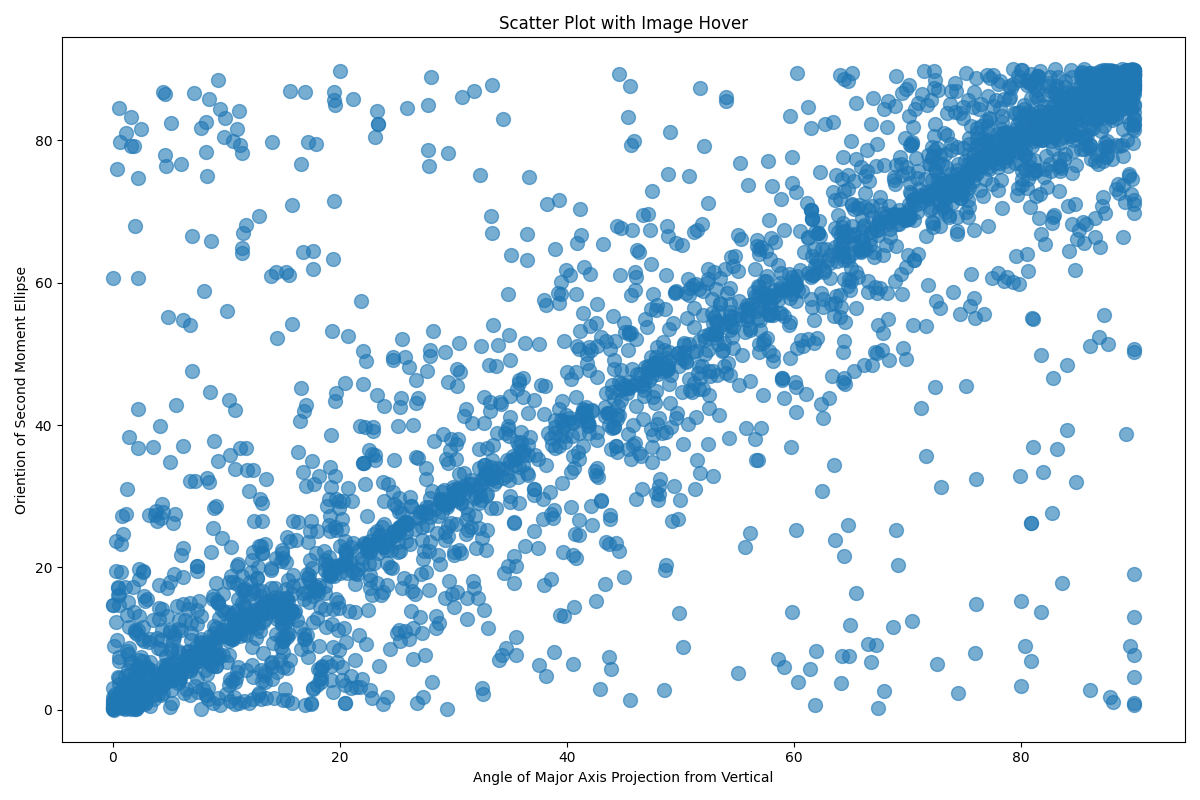

In [61]:
# Enable interactive mode for Jupyter
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np


# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot
scatter = ax.scatter(
    combined_dataframe['angle_from_vert'],
    combined_dataframe['orientation_degrees_from_vertical'],
    s=100,
    alpha=0.6
)

ax.set_xlabel('Angle of Major Axis Projection from Vertical')
ax.set_ylabel('Oriention of Second Moment Ellipse')
ax.set_title('Scatter Plot with Image Hover')

# Create an annotation box for the image (initially invisible)
imagebox = AnnotationBbox(
    OffsetImage(np.zeros((10, 10, 3)), zoom=1),
    (0, 0),
    frameon=True,
    pad=0.5,
    box_alignment=(0.5, -0.1),
    visible=False
)
ax.add_artist(imagebox)

# Text annotation for labels
annot = ax.annotate(
    "",
    xy=(0, 0),
    xytext=(10, 10),
    textcoords="offset points",
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.9),
    fontsize=10,
    visible=False
)

def hover(event):
    if event.inaxes == ax:
        # Check if mouse is over a point
        cont, ind = scatter.contains(event)
        
        if cont:
            # Get the index of the point and convert to Python int
            idx = int(ind["ind"][0])
            
            # Get data for this point (Polars syntax)
            x = combined_dataframe['angle_from_vert'][idx]
            y = combined_dataframe['orientation_degrees_from_vertical'][idx]
            image_name = combined_dataframe['image'][idx]
            image_path = combined_dataframe['annotated_image_path'][idx]
            
            # Update text annotation
            text = f"{image_name}\nMajor Axis: {x:.2f}\nEllipse: {y:.2f}"
            annot.xy = (x, y)
            annot.set_text(text)
            annot.set_visible(True)
            
            # Load and display image
            try:
                img = Image.open(image_path)
                # Resize image if too large
                img.thumbnail((400, 400))
                
                # Update image box
                imagebox_new = OffsetImage(img, zoom=1)
                imagebox.offsetbox = imagebox_new
                imagebox.xy = (x, y)
                imagebox.set_visible(True)
            except Exception as e:
                print(f"Error loading image: {e}")
                imagebox.set_visible(False)
            
            fig.canvas.draw_idle()
        else:
            # Hide annotations when not hovering over points
            if annot.get_visible():
                annot.set_visible(False)
                imagebox.set_visible(False)
                fig.canvas.draw_idle()

# Connect the hover event
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.tight_layout()
plt.show()